In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [9]:
data = pd.read_csv('data/dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [16]:
X = pd.read_csv('data/dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
y = data['Class'].to_numpy()
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [20]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)
X[0]

array([-1.71291154e+00, -3.32153339e-17, -6.53912840e-01, -1.87082869e+00,
       -8.35531692e-01, -1.93309133e+00, -1.57589457e+00, -9.73440458e-01,
       -1.05999788e-01, -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
       -5.51677284e-01,  3.44342023e+00, -1.85695338e-01, -3.33333333e-01,
       -1.05999788e-01, -2.42535625e-01, -4.29197538e-01,  7.97724035e-01,
       -5.68796459e-01, -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
       -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,  9.43398113e+00,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
       -1.05999788e-01, -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
       -1.50755672e-01, -

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((72, 80), (18, 80))

In [25]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()
gs_cv = GridSearchCV(lr, parameters, scoring='accuracy', cv=10)
logreg_cv = gs_cv.fit(X_train, Y_train)

print("Tuned Hyperparameters", logreg_cv.best_params_)
print("Logistic Regression Train Accuracy", logreg_cv.best_score_)
print('Logistic Regression Test Acuuracy:', logreg_cv.score(X_test, Y_test))

Tuned Hyperparameters {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Train Accuracy 0.8214285714285714
Logistic Regression Test Acuuracy: 0.8333333333333334


In [27]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

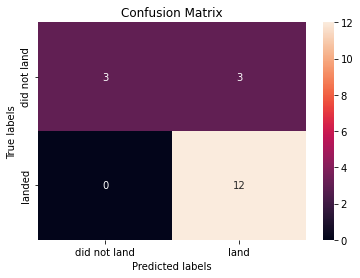

In [28]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [31]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

gs_cv = GridSearchCV(svm,parameters, scoring='accuracy', cv=10)
svm_cv = gs_cv.fit(X_train, Y_train)

print("Tuned Hyperparameters", svm_cv.best_params_)
print("SVM Train Acuuracy", svm_cv.best_score_)
print("SVM Test Accuracy", svm_cv.score(X_test, Y_test))

Tuned Hyperparameters {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
SVM Train Acuuracy 0.8482142857142858
SVM Test Accuracy 0.8333333333333334


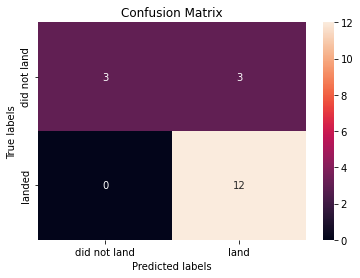

In [32]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [33]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
gs_cv = GridSearchCV(tree,parameters, scoring='accuracy', cv=10)
tree_cv = gs_cv.fit(X_train, Y_train)

print("Tuned Hyperparameters", tree_cv.best_params_)
print("Decission Tree Classifier Train Accuracy", tree_cv.best_score_)
print("Decission Tree Classifier Test Accuacy", tree_cv.score(X_test, Y_test))

Tuned Hyperparameters {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Decission Tree Classifier Train Accuracy 0.8625
Decission Tree Classifier Test Accuacy 0.8888888888888888


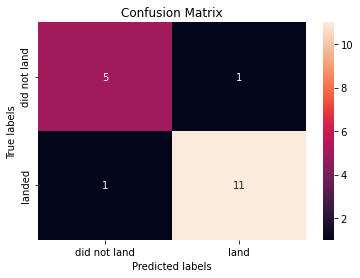

In [35]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [36]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

gs_cv = GridSearchCV(KNN, parameters, scoring='accuracy', cv=10)
knn_cv = gs_cv.fit(X_train, Y_train)

print("Tuned Hyperparameters",knn_cv.best_params_)
print("KNN Train Accuracy",knn_cv.best_score_)
print("KNN Test Accuacy",knn_cv.score(X_test, Y_test))

Tuned Hyperparameters {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
KNN Train Accuracy 0.8339285714285714
KNN Test Accuacy 0.8333333333333334


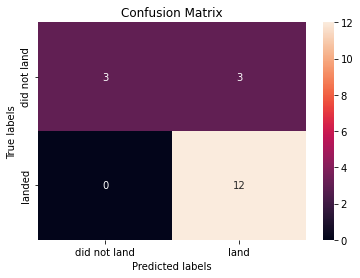

In [37]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [38]:
algorithms = {'KNN':knn_cv.best_score_,'Decision Tree':tree_cv.best_score_,'Logistic Regression':logreg_cv.best_score_,'SVM':svm_cv.best_score_}
best_algorithm = max(algorithms, key= lambda x: algorithms[x])

print('The method which performs best is \"',best_algorithm,'\" with a score of',algorithms[best_algorithm])

The method which performs best is " Decision Tree " with a score of 0.8625


In [40]:
algo_df = pd.DataFrame.from_dict(algorithms, orient='index', columns=['Accuracy'])
algo_df.sort_values(['Accuracy'], inplace=True)

algo_df.head()

,Accuracy
Logistic Regression,0.821429
KNN,0.833929
SVM,0.848214
Decision Tree,0.862500


In [41]:
algo_df = algo_df.reset_index()
algo_df.rename(columns = {'index': 'Algorithm'}, inplace = True)
algo_df.head()

,Algorithm,Accuracy
0,Logistic Regression,0.821429
1,KNN,0.833929
2,SVM,0.848214
3,Decision Tree,0.862500
